# Advanced Regression
___
## Data: Wine Quality 

The [Wine Quality](http://archive.ics.uci.edu/ml/datasets/Wine+Quality) dataset contains data on samples of white vinho verde wine. There are various attributes based on physicochemical tests as well as a quality attribute. 

In [35]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')

In [36]:
df = pd.read_csv('winequality-white.csv', sep=';')

In [37]:
df.columns = ['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [38]:
df.shape

(4898, 12)

In [39]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# Exploration

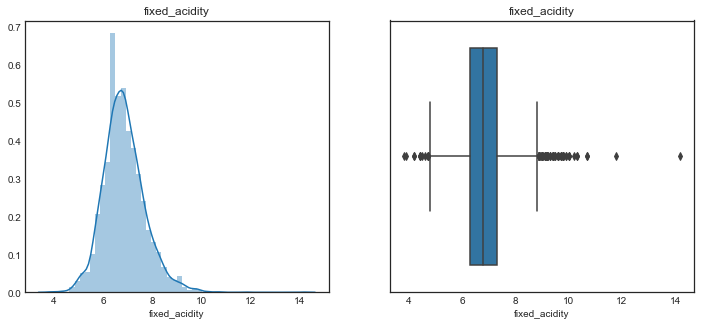

In [41]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['fixed_acidity'])
plt.title('fixed_acidity')

plt.subplot(1, 2, 2)
sns.boxplot(df['fixed_acidity'])
plt.title('fixed_acidity')

plt.show()

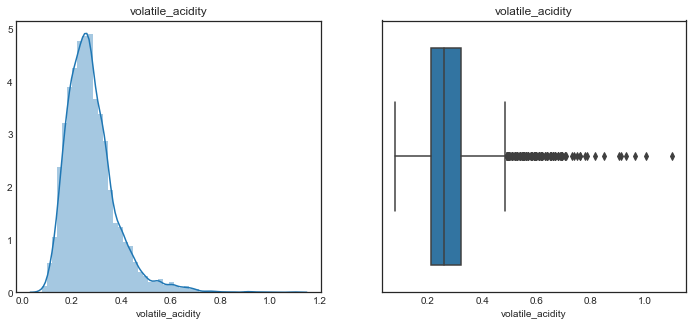

In [42]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['volatile_acidity'])
plt.title('volatile_acidity')

plt.subplot(1, 2, 2)
sns.boxplot(df['volatile_acidity'])
plt.title('volatile_acidity')

plt.show()

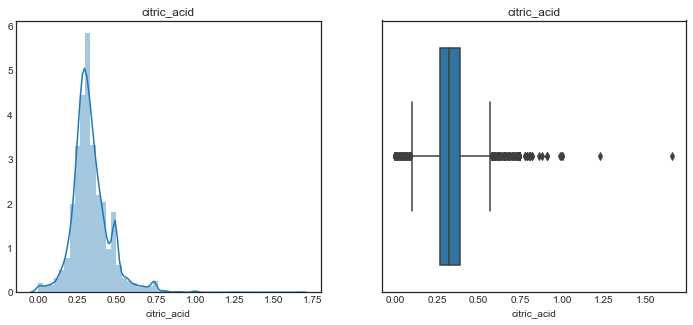

In [43]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['citric_acid'])
plt.title('citric_acid')

plt.subplot(1, 2, 2)
sns.boxplot(df['citric_acid'])
plt.title('citric_acid')

plt.show()

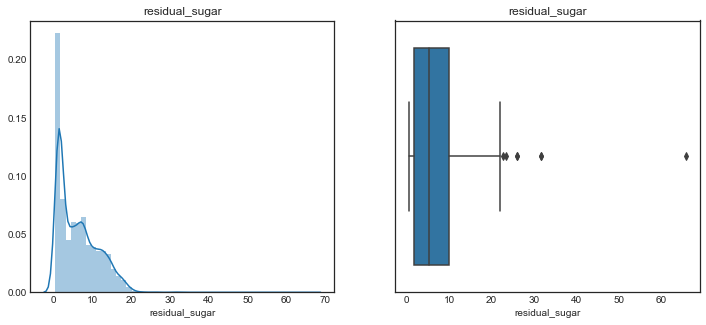

In [44]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['residual_sugar'])
plt.title('residual_sugar')

plt.subplot(1, 2, 2)
sns.boxplot(df['residual_sugar'])
plt.title('residual_sugar')

plt.show()

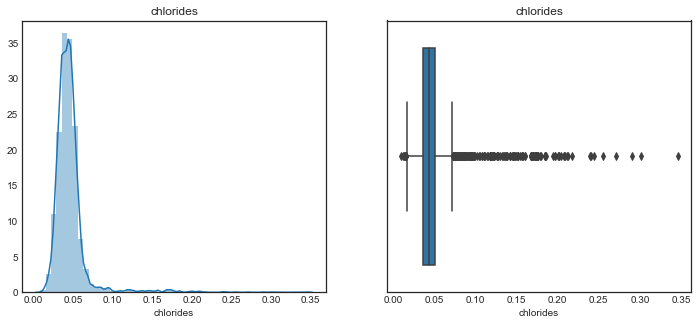

In [45]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['chlorides'])
plt.title('chlorides')

plt.subplot(1, 2, 2)
sns.boxplot(df['chlorides'])
plt.title('chlorides')

plt.show()

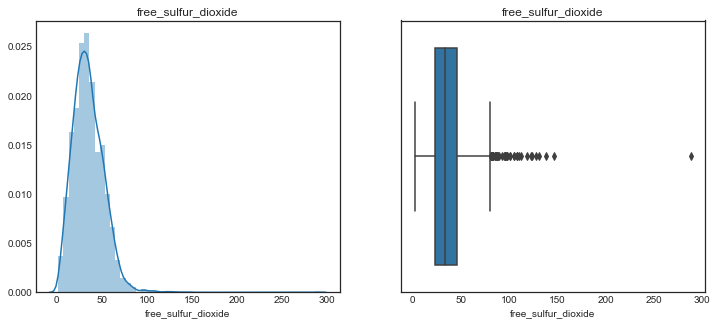

In [46]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['free_sulfur_dioxide'])
plt.title('free_sulfur_dioxide')

plt.subplot(1, 2, 2)
sns.boxplot(df['free_sulfur_dioxide'])
plt.title('free_sulfur_dioxide')

plt.show()

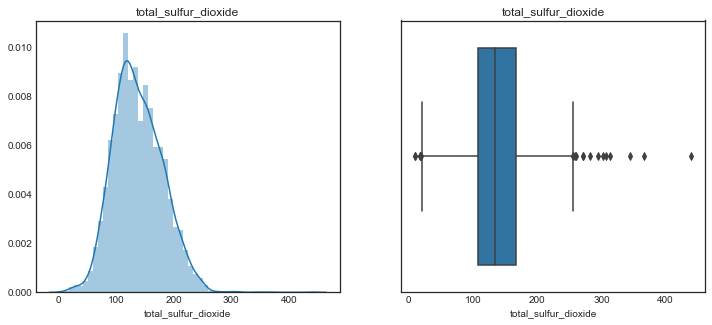

In [47]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['total_sulfur_dioxide'])
plt.title('total_sulfur_dioxide')

plt.subplot(1, 2, 2)
sns.boxplot(df['total_sulfur_dioxide'])
plt.title('total_sulfur_dioxide')

plt.show()

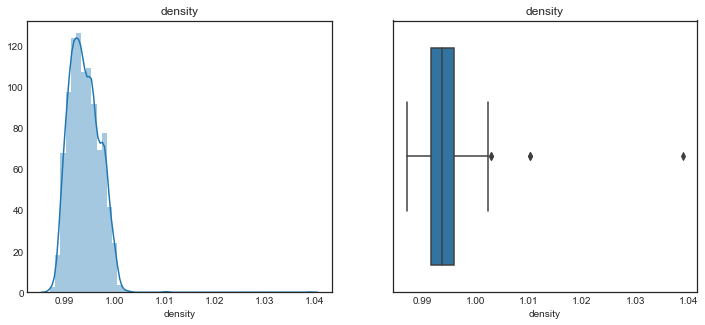

In [48]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['density'])
plt.title('density')

plt.subplot(1, 2, 2)
sns.boxplot(df['density'])
plt.title('density')

plt.show()

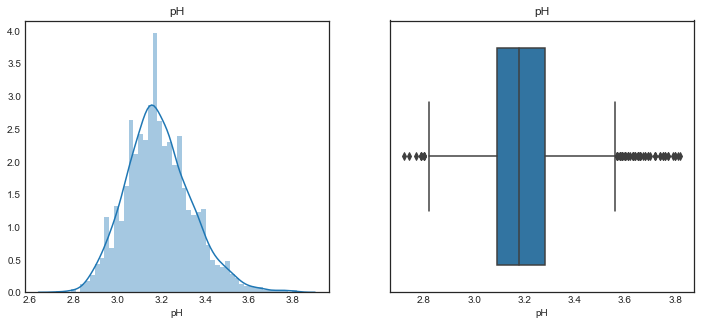

In [49]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['pH'])
plt.title('pH')

plt.subplot(1, 2, 2)
sns.boxplot(df['pH'])
plt.title('pH')

plt.show()

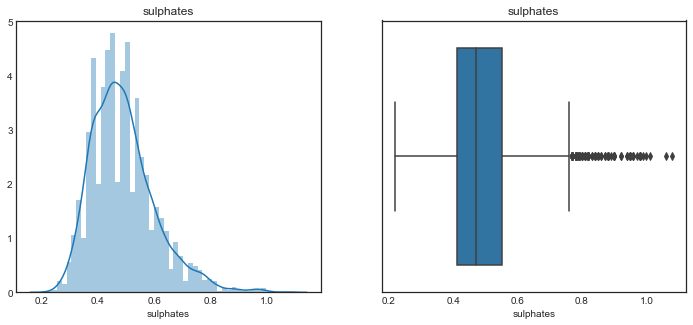

In [50]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['sulphates'])
plt.title('sulphates')

plt.subplot(1, 2, 2)
sns.boxplot(df['sulphates'])
plt.title('sulphates')

plt.show()

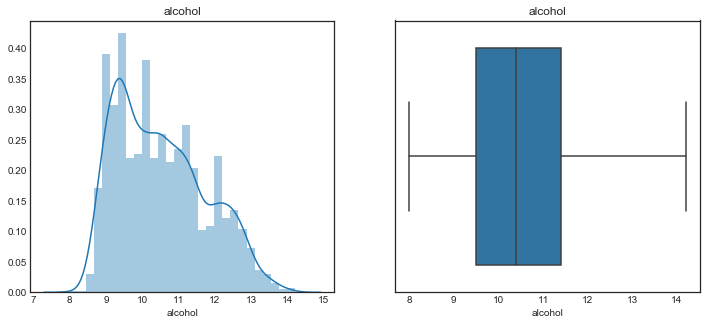

In [51]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['alcohol'])
plt.title('alcohol')

plt.subplot(1, 2, 2)
sns.boxplot(df['alcohol'])
plt.title('alcohol')

plt.show()

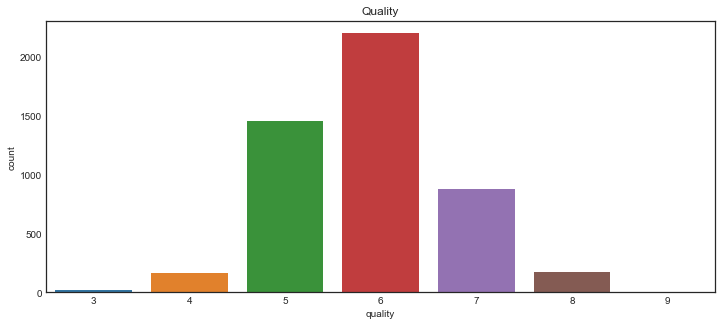

In [52]:
plt.figure(figsize=(12,5))
sns.countplot(x="quality", data=df)
plt.title('Quality')
plt.show()

In [53]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

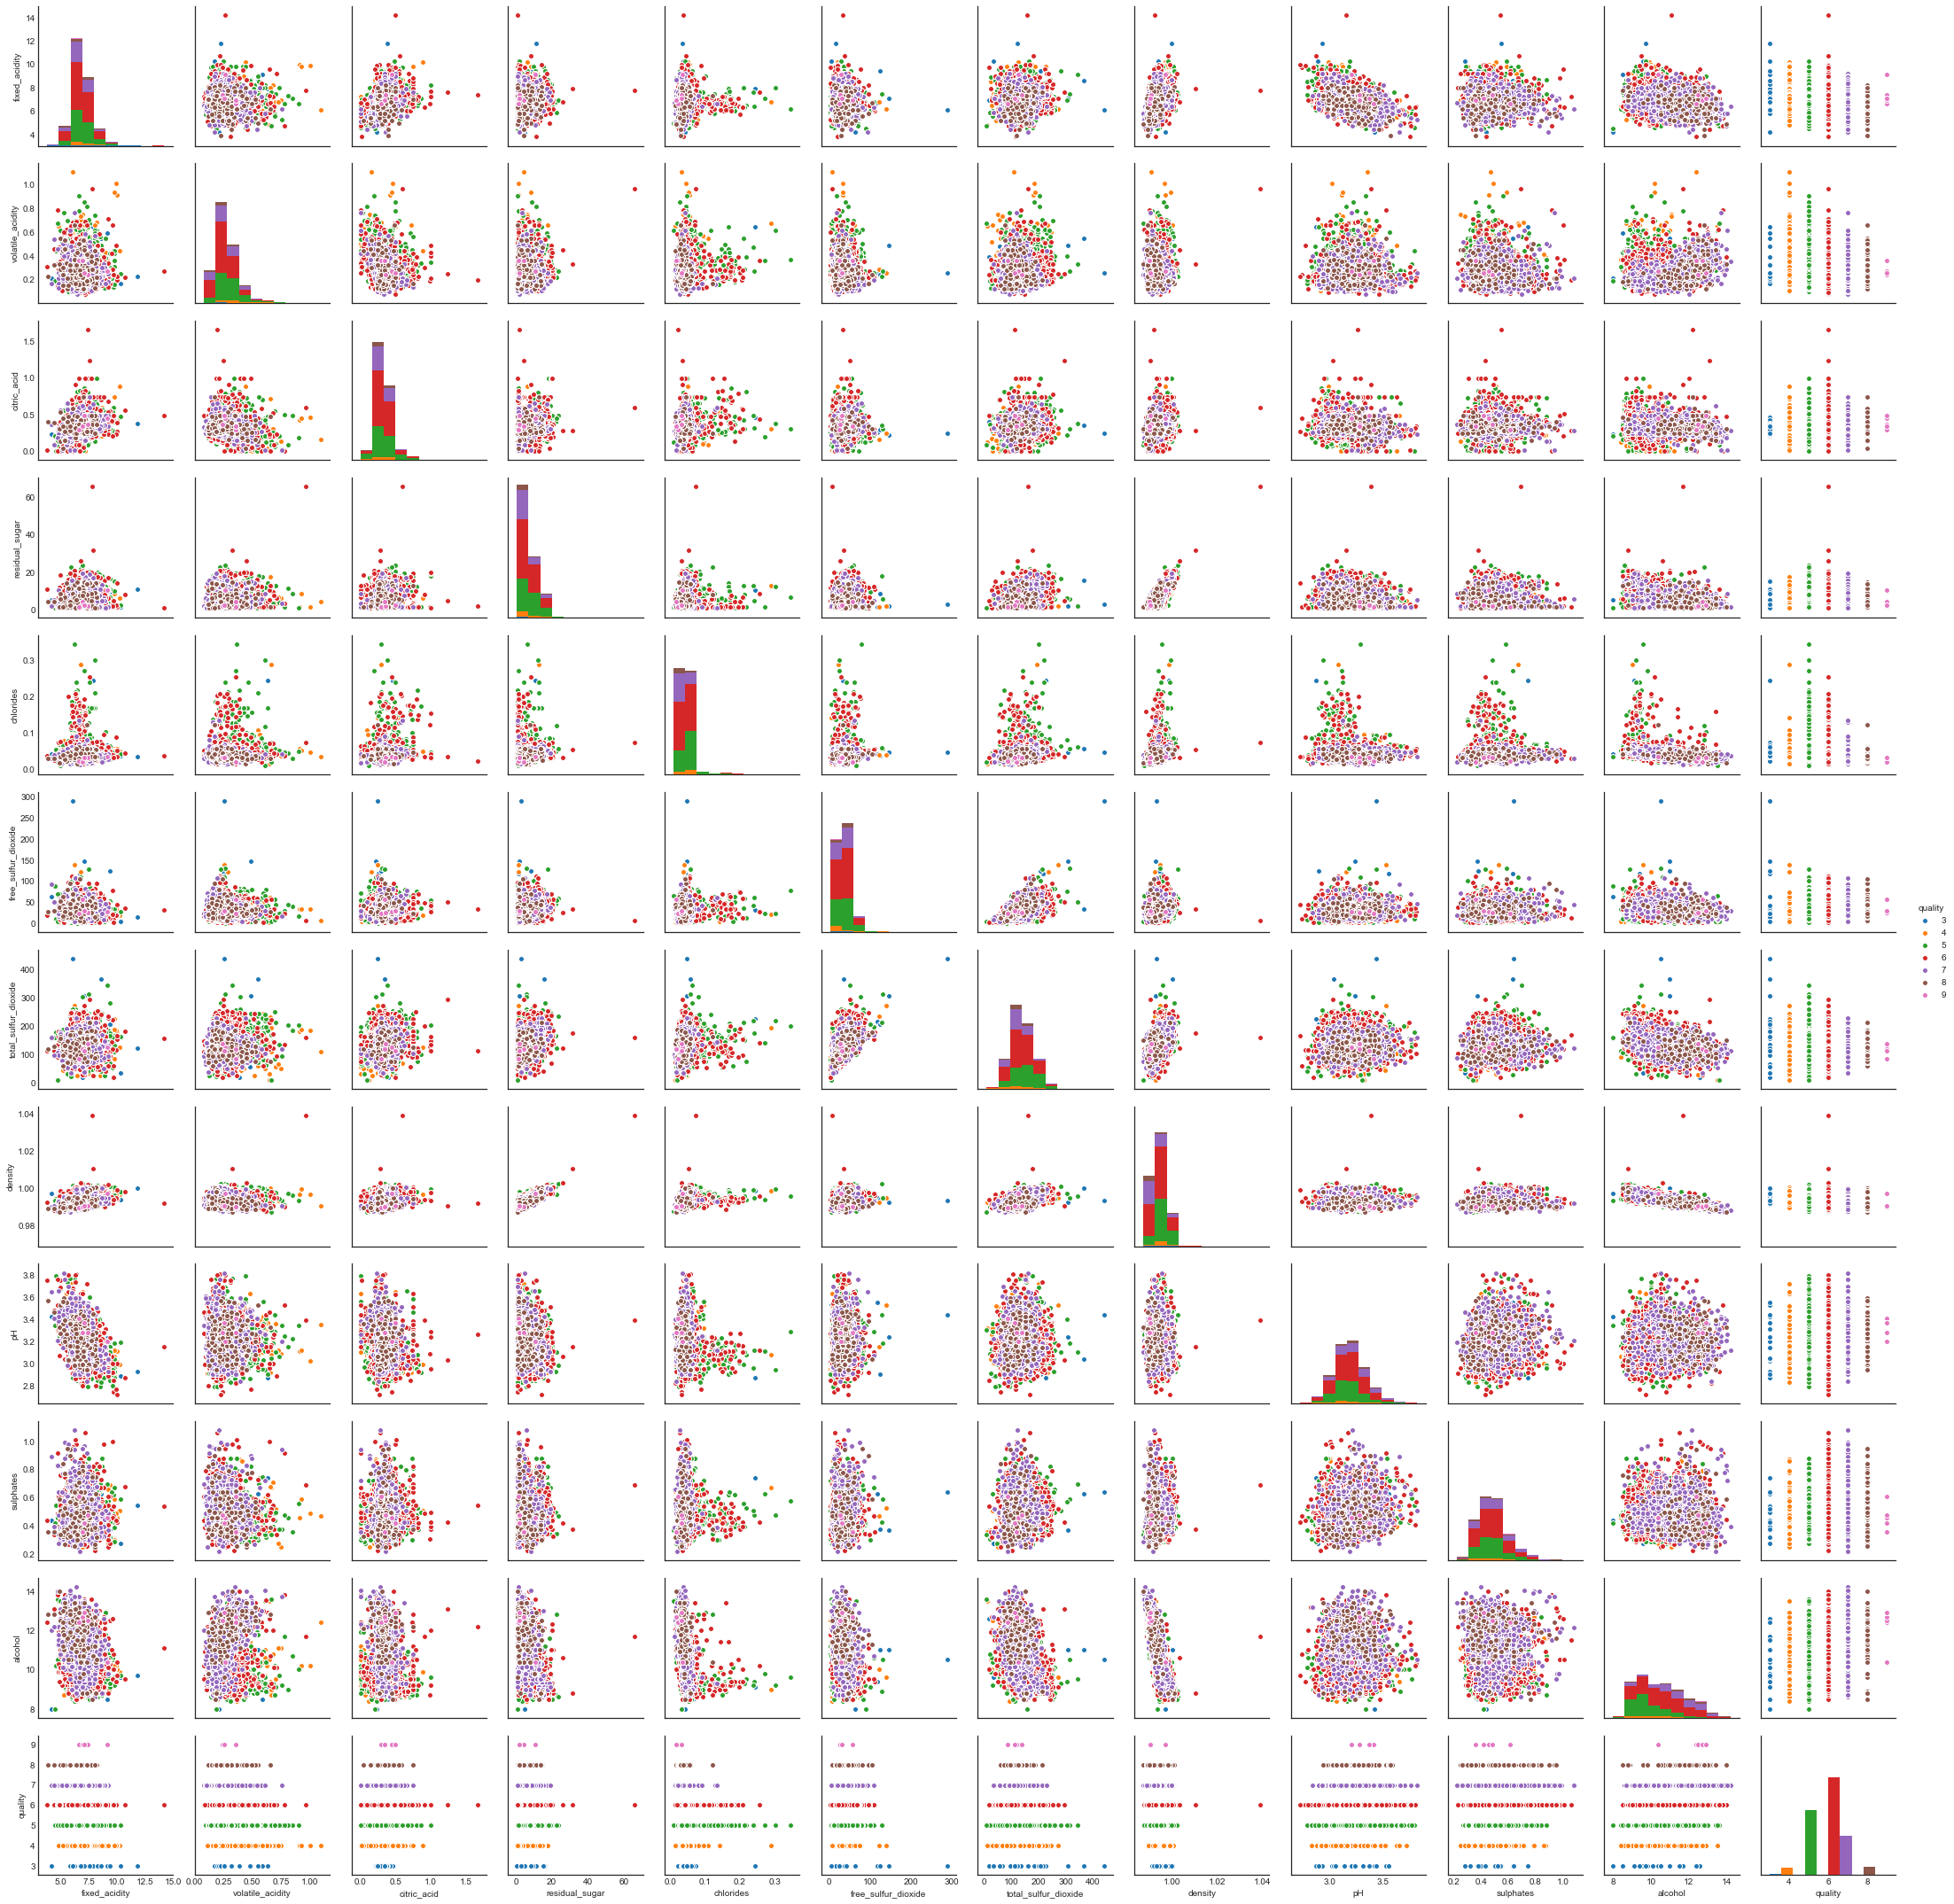

In [54]:
sns.pairplot(df, hue="quality")

# Add Features

In [55]:
df['log_residual_sugar'] = df['residual_sugar'].apply(np.log)
#df['total_sulfur_dioxide_squared'] = df['total_sulfur_dioxide'] ** 2

In [56]:
X = df.drop('quality', axis=1)
y = df.quality

In [57]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'log_residual_sugar'],
      dtype='object')

## Fitting Logistic Regression

In [58]:
lr = LogisticRegression(C=1e9) 
fit = lr.fit(X, y)

In [59]:
# Get results
print('Coefficients')
coef = fit.coef_
print(coef)
print(fit.intercept_)

lr_scores = cross_val_score(lr, X, y, cv=10)
print('\nCross Validation Scores')
print(lr_scores)

Coefficients
[[ 9.23147468e-01  3.12832514e+00 -1.54693010e+00  4.72974379e-02
   1.02814347e+01  2.63747256e-02  3.58682922e-03 -1.00635045e+01
   2.23256287e+00 -2.98247523e+00  3.88709639e-02 -4.06351020e-01]
 [ 3.60451210e-01  6.14254149e+00 -3.07969739e-01 -4.49625388e-02
   8.13320482e-02 -4.39894080e-02 -2.94553211e-03 -1.21920499e+00
   9.21807037e-01 -8.72744646e-02 -5.59199660e-01 -1.92285527e-01]
 [ 3.40041647e-02  3.95842580e+00  1.55899034e-01 -1.30044610e-02
   6.71493260e-01 -8.39815438e-03  4.37484345e-03  4.63782102e+00
  -4.29856223e-01 -1.30819365e+00 -9.19041741e-01 -2.34794139e-01]
 [-7.15349012e-02 -3.71610337e+00  1.65392785e-01  1.08623590e-02
   8.02510445e-01  2.59967000e-04 -4.57033070e-05  1.60961013e-01
  -2.49580051e-01  1.57466877e-01  1.41329060e-01  7.10664911e-02]
 [ 9.15443989e-02 -4.13141606e+00 -1.02190470e+00 -4.01616453e-03
  -4.24678319e+00  9.10451942e-03 -3.65612452e-03 -6.88702795e+00
   1.16995744e+00  1.38774051e+00  7.80674853e-01  2.862596

In [73]:
# Explore what RFE has to say about the features
from sklearn.feature_selection import RFE

# Pass any estimator to the RFE constructor
selector = RFE(lr)
selector = selector.fit(X, y)
rankings = pd.DataFrame({'Features': X.columns, 'Ranking' : selector.ranking_})
rankings.sort_values('Ranking')

,Features,Ranking
1,volatile_acidity,1
2,citric_acid,1
4,chlorides,1
7,density,1
8,pH,1
9,sulphates,1
10,alcohol,2
0,fixed_acidity,3
11,log_residual_sugar,4
3,residual_sugar,5


In [81]:
#Drop low ranking features
X_2 = X[['volatile_acidity', 'citric_acid', 'chlorides', 'density', 'pH', 'sulphates']]
cross_val_score(lr, X_2, y, cv=10)

array([0.48780488, 0.49796748, 0.45731707, 0.45213849, 0.50916497,
       0.55214724, 0.47852761, 0.47336066, 0.51334702, 0.46201232])

## Adding L1 regularization

   mean_cvs   cvs_std    alpha
0  0.448759  0.001314  0.00001
1  0.448759  0.001314  0.00010
2  0.449381  0.013672  0.00100
3  0.453716  0.029367  0.01000


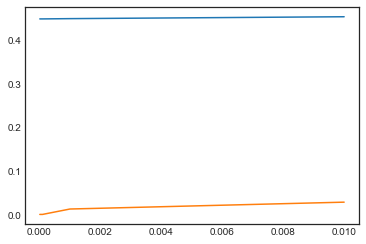

In [60]:
#Tuning lambda
mean_cvs = []
cvs_std = []
alpha = []

C_param_range = [0.00001, 0.0001, 0.001, 0.01]

for i in C_param_range:
    lr_l1 = LogisticRegression(C=i, penalty='l1')
    mean_cvs.append(cross_val_score(lr_l1, X, y, cv=10).mean())
    cvs_std.append(cross_val_score(lr_l1, X, y, cv=10).std())
    alpha.append(i)

alpha_df = pd.DataFrame({'mean_cvs': mean_cvs, 'cvs_std': cvs_std, 'alpha': alpha})
plt.plot(alpha_df.alpha, alpha_df.mean_cvs)
plt.plot(alpha_df.alpha, alpha_df.cvs_std)
print(alpha_df)

In [61]:
lr_l1 = LogisticRegression(C=.01, penalty='l1')
cross_val_score(lr_l1, X, y, cv=10)

array([0.40243902, 0.44715447, 0.46747967, 0.42566191, 0.42566191,
       0.51329243, 0.45807771, 0.46311475, 0.48049281, 0.45379877])

In [62]:
lr_l1 = LogisticRegression(C=.001, penalty='l1')
cross_val_score(lr_l1, X, y, cv=10)

array([0.43495935, 0.42682927, 0.47764228, 0.43788187, 0.44806517,
       0.46216769, 0.44785276, 0.45286885, 0.44969199, 0.45585216])

In [63]:
lr_l1 = LogisticRegression(C=.0001, penalty='l1')
cross_val_score(lr_l1, X, y, cv=10)

array([0.44715447, 0.44715447, 0.44715447, 0.44806517, 0.44806517,
       0.44989775, 0.44989775, 0.45081967, 0.44969199, 0.44969199])

In [64]:
lr_l1_fit = lr_l1.fit(X, y)

In [65]:
print(lr_l1_fit.coef_)

[[ 0.          0.          0.          0.          0.          0.
  -0.03031085  0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.02270551  0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.00444407  0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.00107951  0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.01056077  0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.02222698  0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.0326058   0.          0.          0.          0.          0.        ]]


In [66]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,log_residual_sugar
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,3.030134
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0.470004
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1.931521
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2.140066
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2.140066


In [77]:
X_2 = np.array(X['total_sulfur_dioxide'])

lr_l1 = LogisticRegression(C=.0001, penalty='l1')
cross_val_score(lr_l1, X_2.reshape(-1, 1), y, cv=10)

array([0.44715447, 0.44715447, 0.44715447, 0.44806517, 0.44806517,
       0.44989775, 0.44989775, 0.45081967, 0.44969199, 0.44969199])

## Adding L2 regularization

   mean_cvs   cvs_std    alpha
0  0.449981  0.001223  0.00001
1  0.447949  0.015737  0.00010
2  0.453096  0.030142  0.00100
3  0.468213  0.035086  0.01000


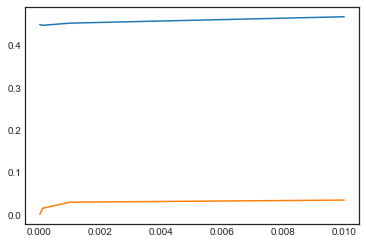

In [67]:
#Tuning lambda
mean_cvs = []
cvs_std = []
alpha = []

C_param_range = [0.00001, 0.0001, 0.001, 0.01]

for i in C_param_range:
    lr_l2 = LogisticRegression(C=i, penalty='l2')
    mean_cvs.append(cross_val_score(lr_l2, X, y, cv=10).mean())
    cvs_std.append(cross_val_score(lr_l2, X, y, cv=10).std())
    alpha.append(i)

alpha_df = pd.DataFrame({'mean_cvs': mean_cvs, 'cvs_std': cvs_std, 'alpha': alpha})
plt.plot(alpha_df.alpha, alpha_df.mean_cvs)
plt.plot(alpha_df.alpha, alpha_df.cvs_std)
print(alpha_df)

In [68]:
lr_l2 = LogisticRegression(C=.01, penalty="l2")
cross_val_score(lr_l2, X, y, cv=10)

array([0.40447154, 0.46341463, 0.4796748 , 0.43991853, 0.43991853,
       0.5398773 , 0.49897751, 0.4692623 , 0.48665298, 0.45995893])

In [69]:
lr_l2 = LogisticRegression(C=.001, penalty="l2")
cross_val_score(lr_l2, X, y, cv=10)

array([0.39227642, 0.44715447, 0.47764228, 0.42362525, 0.43991853,
       0.50920245, 0.45603272, 0.45286885, 0.47638604, 0.45585216])

In [70]:
lr_l2 = LogisticRegression(C=.0001, penalty="l2")
cross_val_score(lr_l2, X, y, cv=10)

array([0.40650407, 0.44918699, 0.46544715, 0.45213849, 0.45010183,
       0.46830266, 0.44580777, 0.44672131, 0.44558522, 0.44969199])

In [71]:
lr_l2 = LogisticRegression(C=.00001, penalty="l2")
cross_val_score(lr_l2, X, y, cv=10)

array([0.45121951, 0.45121951, 0.44918699, 0.44806517, 0.44806517,
       0.44989775, 0.44989775, 0.45081967, 0.45174538, 0.44969199])

In [72]:
# Explore what RFE has to say about the features
from sklearn.feature_selection import RFE

# Pass any estimator to the RFE constructor
selector = RFE(lr_l2)
selector = selector.fit(X, y)
rankings = pd.DataFrame({'Features': X.columns, 'Ranking' : selector.ranking_})
rankings.sort_values('Ranking')

,Features,Ranking
0,fixed_acidity,1
3,residual_sugar,1
5,free_sulfur_dioxide,1
6,total_sulfur_dioxide,1
8,pH,1
10,alcohol,1
7,density,2
11,log_residual_sugar,3
9,sulphates,4
2,citric_acid,5


# Discussion

The logistic regression without any regularization seems to over-fit the data as indicated by the wide range of cross validation scores: **.43 to .60**
For feature selection, initially all of the original features were used plus the addition of log_residual_sugar, which was added experimentally. Recursive feature elimination was performed and the features ranked lower than 1 were dropped. Doing so reduced the range of the cross validation scores to **.45 to .55**  

For ridge regression (l2 regularization) the same original features were started with and lambda values from 0.00001 to 0.01 were tested. Even at .01, the model still seemed to over-fit. The most consistent cross validation scores were with the lambda of 0.00001, however the mean accuracy was slightly lower.  

For lasso regression (l1 regularization) the same original features were used, and lambda values from 0.00001 to 0.01 were tested. There was no difference in performance once the lambda value was below 0.0001, so that was the final value used. The model reduce all of the parameters to 0 except for total_sulfur_dioxide. Just to further illustrate it's effect, all the features were dropped except total_sulfur_dioxide, and the results were the same.  

The Lasso regression is the best of the three models mainly because of it's built in feature selection. With tuning the regularization parameter comes finding a balance of not having a generic model with a very small lambda that fails to detect the variance of the data, and wanting to achieve consistent cross validation scores by not over-fitting either.